In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob
import os
import matplotlib.pyplot as plt
from tqdm import  tqdm

# Experiment 1a-b

In [2]:
e1adat = pd.read_csv('../OldSharedFiles/knowledgeBeforeBelief/data/study1a.csv', header=0)
e1adat['group'] = 'study 1A'
e1bdat = pd.read_csv('../OldSharedFiles/knowledgeBeforeBelief/data/study1b.csv', header=0)
e1bdat['group'] = 'study 1B'
e1dat = pd.concat([e1adat, e1bdat], ignore_index=True)
#e1dat = e1dat.reset_index(drop=True)
e1dat = e1dat.loc[e1dat.condition != 'D'] # remove distractors
e1dat.sort_values('subj')
#sdat = e1dat.loc[e1dat.subj == e1dat.subj.unique()[10]]
e1dat['ascription'] = ['Thinks' if int(x) == 0 else 'Knows'  for x in e1dat.question]  # Make binary variable a string
for v, cond in zip(sorted(e1dat.condition.unique()),['True Info', 'False Info', 'Ignorance', 'True Info', 'False Info', 'Ignorance']):
    print(f'{v} --> {cond}')
    e1dat.loc[e1dat.condition == v, 'agent_state'] = cond
# participant response
for v, cond in zip(sorted(e1dat.response.unique()), [False, True]):
    print(f'{v} --> {cond}')
    e1dat.loc[e1dat.response == v, 'resp'] = cond

e1dat['correct_answer'] = False
e1dat.loc[e1dat.agent_state == 'True Info', 'correct_answer'] = True
# checking accuracy
e1dat['correct'] = e1dat.apply(lambda row: row['resp'] == row['correct_answer'], axis=1)
eleven = 0
e1dat[['accurate', 'too_fast', 'too_slow']] = False
e1dat.rename(columns={'subj': 'subject'}, inplace=True)

for i, subj in tqdm(enumerate(e1dat.subject.unique())):
    sdat = e1dat.loc[e1dat.subject == subj]
    if len(sdat) != 12:
        print('ohshit')
        eleven += 1
    if sdat.correct.mean() >= .67:
        e1dat.loc[e1dat.subject == subj, 'accurate'] = True
    if sdat.rt.mean() < 1000:
        e1dat.loc[e1dat.subject == subj, 'too_fast'] = True
    if sdat.rt.mean() > 4000:
        e1dat.loc[e1dat.subject == subj, 'too_slow'] = True

e1dat['in_sample'] = False
e1dat.loc[(e1dat.accurate == True) & (e1dat.too_fast == False) & (e1dat.too_slow == False), 'in_sample'] = True
# trial exclusion
e1dat = e1dat.loc[(e1dat.rt > 1000) & (e1dat.rt < 4500)]

0it [00:00, ?it/s]

0 --> True Info
1 --> False Info
2 --> Ignorance
3 --> True Info
4 --> False Info
5 --> Ignorance
0 --> False
1 --> True
ohshit
ohshit


617it [00:01, 383.49it/s]

ohshit


699it [00:01, 416.42it/s]


In [3]:
print(f'{len(e1dat.loc[e1dat.accurate == False].subject.unique())} subjects excluded. {len(e1dat.loc[e1dat.in_sample==True].subject.unique())} remain ') # from 61 excluded - to 95

95 subjects excluded. 524 remain 


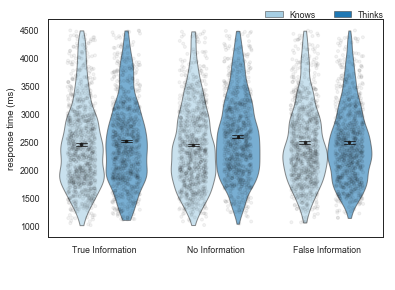

In [101]:

sns.set(font_scale=1.2)
sns.set_theme(style="white")
#sns.color_palette("Paired")
sns.set_context("paper")
g = sns.violinplot(x='agent_state', y='rt', order=['True Info', 'Ignorance', 'False Info'], hue='ascription', hue_order=['Knows', 'Thinks'] ,kind='violin', cut=0,col='group', inner=None, bw=.21, linewidth=1, saturation=1, palette="Paired", data=e1dat.loc[(e1dat.correct==True) & (e1dat.in_sample == True)]);

sns.stripplot(x='agent_state', y='rt', order=['True Info', 'Ignorance', 'False Info'], hue='ascription', hue_order=[ 'Knows', 'Thinks'] , color='k',size=3, dodge=True,  jitter=.25, linewidth=1, alpha=.05, ax=g.axes, data=e1dat.loc[(e1dat.correct==True) & (e1dat.in_sample == True)]).legend_.remove();


sns.pointplot(x='agent_state', y='rt', order=['True Info', 'Ignorance', 'False Info'], hue='ascription', hue_order=[ 'Knows', 'Thinks'], join=False, dodge=.4, capsize=.1, errwidth=.8, ax=g.axes, scale=.5, color='k', ci=68, data =e1dat.loc[(e1dat.correct==True) & (e1dat.in_sample == True)]);

g.axes.yaxis.set_label_text("response time (ms)")
g.axes.xaxis.set_label_text(" ")
g.axes.xaxis.labelpad = 20
plt.legend(handles=g.axes.legend_.legendHandles[:2]);
#plt.title(f'Agent State x Ascription, N={len(e1dat.subj.unique())}');
sns.move_legend(g.axes, "lower left", bbox_to_anchor=(.625, .965), ncol=2, title=None, frameon=False);
g.set_xticklabels(['True Information', 'No Information', 'False Information']);
[x.set_alpha(.6) for x in g.axes.collections[:6]]
#plt.savefig('./Figures/rtxagentxasript_exp1ab.png', dpi=100)
g.figure.savefig('./Figures/rtxagentxasript_exp1ab_final.png', dpi=300)

# Experiment 2

In [3]:
df = pd.read_csv('./Data/full_sample_clean.csv', sep=',', index_col=0)
def jitter(values,j):
    return values + np.random.normal(j,0.15,values.shape)

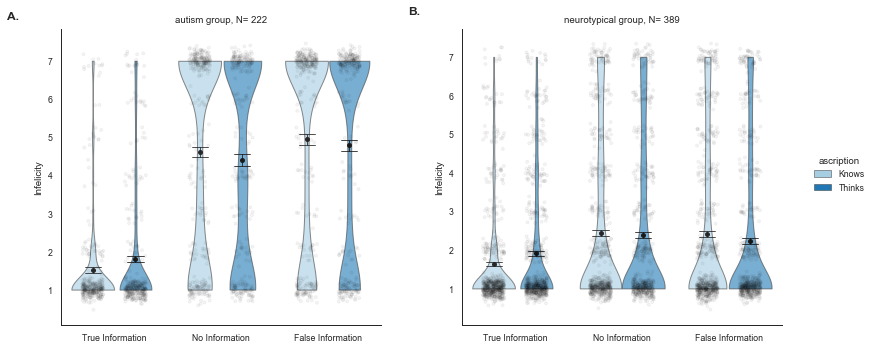

In [11]:
sns.set(font_scale=2)
sns.set_theme(style="white")
sns.color_palette("Paired")
sns.set_context("paper")

f1 = df.loc[(df.group== 'autism') & (df.in_sample==True) & (df.correct == True)]
f2 = df.loc[(df.group== 'neurotypical') & (df.in_sample==True)& (df.correct == True)]

gg = sns.catplot(x='agent_state', order=['True Info','Ignorance', 'False Info'], y='infelicity', hue='ascription', hue_order=['Knows', 'Thinks'], kind='violin', col='group', cut=0, data=df.loc[(df.in_sample == True)& (df.correct == True)], inner=None, bw=.25, linewidth=1, saturation=1, palette="Paired", sharey=False, aspect=.8);

sns.stripplot(x='agent_state', order=['True Info','Ignorance', 'False Info'], y=jitter(f1['infelicity'], 0), hue='ascription', hue_order=['Knows', 'Thinks'],size=3, data=f1, color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.045, ax=gg.axes[0][0]);

sns.stripplot(x='agent_state', order=['True Info','Ignorance', 'False Info'], y=jitter(f2['infelicity'], 0), hue='ascription', hue_order=['Knows', 'Thinks'],size=3, data=f2, color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.045, ax=gg.axes[0][1]);

sns.pointplot(x='agent_state', order=['True Info','Ignorance', 'False Info'], y=jitter(f1['infelicity'], 0), hue='ascription', hue_order=['Knows', 'Thinks'],scale=.7, data=f1, join=False, dodge=.4, capsize=.15, ci=68,errwidth=.8, ax=gg.axes[0][0], color='k',);

sns.pointplot(x='agent_state', order=['True Info','Ignorance', 'False Info'], y=jitter(f2['infelicity'], 0), hue='ascription', hue_order=['Knows', 'Thinks'],scale=.7, data=f2, join=False, dodge=.4, capsize=.15,ci=68,errwidth=.8,  ax=gg.axes[0][1], color='k',);


#ax.legend(g.get_legend_handles_labels()[0][:2], g.get_legend_handles_labels()[1][:2])
for aa in [0, 1]:
    gg.axes[0][aa].yaxis.set_label_text("Infelicity")
    gg.axes[0][aa].xaxis.set_label_text("")
    gg.axes[0][aa].xaxis.labelpad = 20
    gg.axes[0][aa].legend_.remove()
    gg.axes[0][aa].set_xticklabels(['True Information', 'No Information', 'False Information']);


gg.axes[0][0].title.set_text(f'autism group, N= {len(df.loc[(df.group=="autism") &(df.in_sample==True)].subject.unique())}')
gg.axes[0][1].title.set_text(f'neurotypical group, N= {len(df.loc[(df.group=="neurotypical") &(df.in_sample==True)].subject.unique())}')
#sns.move_legend(gg.axes, "lower left", bbox_to_anchor=(.625, .965), ncol=2, title=None, frameon=False)
[x.set_alpha(.6) for x in gg.axes[0][0].collections[:6]];
[x.set_alpha(.6) for x in gg.axes[0][1].collections[:6]];
gg.figure.subplots_adjust(wspace=.25)
gg.axes[0][0].text(-1, 8.1, "A.", fontsize=12, fontweight='bold');
gg.axes[0][1].text(-1, 8.1, "B.", fontsize=12, fontweight='bold');
gg.figure.set_size_inches(12, 5)
gg.figure.savefig('./Figures/grpxagntxascrpt_fel_final1.png', dpi=300)

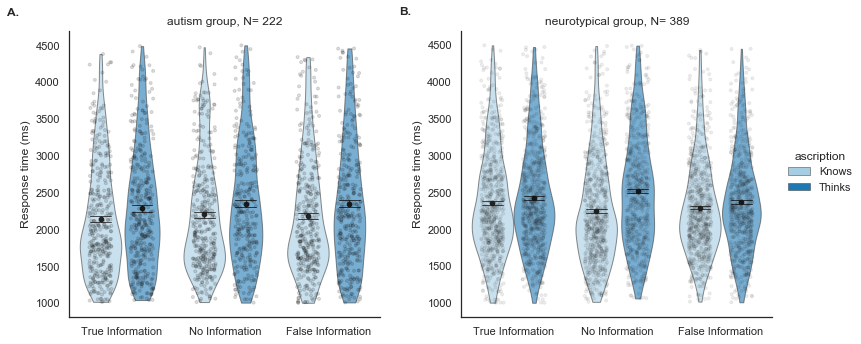

In [6]:

sns.set(font_scale=1.2)
sns.set_theme(style="white")

g = sns.catplot(x='agent_state', y='rt', order=['True Info','Ignorance', 'False Info'], hue='ascription', hue_order=['Knows', 'Thinks'] ,kind='violin', cut=0,col='group', inner=None, bw=.25, linewidth=1, saturation=1,alpha=.25, palette="Paired", data=df.loc[(df.correct == True)&(df.in_sample==True)], sharey=False, aspect=1);

sns.stripplot(x='agent_state', y='rt', order=['True Info','Ignorance', 'False Info'], hue='ascription', hue_order=['Knows', 'Thinks'], color='k', dodge=True,  jitter=.22, linewidth=1, alpha=.14, size=3, ax=g.axes[0][0], data=df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'autism')]);

sns.stripplot(x='agent_state', y='rt', order=['True Info','Ignorance', 'False Info'], hue='ascription',  hue_order=['Knows', 'Thinks'],color='k', dodge=True,  jitter=.22, linewidth=1, alpha=.07,size=3, ax=g.axes[0][1], data=df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'neurotypical')]);

sns.pointplot(x='agent_state', y='rt', order=['True Info','Ignorance', 'False Info'], hue='ascription', hue_order=['Knows', 'Thinks'], join=False, dodge=.4, capsize=.2,ci=68,errwidth=.8,scale=.65, ax=g.axes[0][0], color='k', data =df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'autism')]);

sns.pointplot(x='agent_state', y='rt', order=['True Info','Ignorance', 'False Info'], hue='ascription', hue_order=['Knows', 'Thinks'], join=False, dodge=.4, capsize=.2,ci=68,errwidth=.8,scale=.65, ax=g.axes[0][1], color='k', data=df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'neurotypical')]);


for aa in [0, 1]:
    g.axes[0][aa].yaxis.set_label_text("Response time (ms)")
    g.axes[0][aa].xaxis.set_label_text("")
    g.axes[0][aa].xaxis.labelpad = 20
    g.axes[0][aa].legend_.remove()
    g.axes[0][aa].set_xticklabels(['True Information', 'No Information', 'False Information']);


g.axes[0][0].title.set_text(f'autism group, N= {len(df.loc[(df.in_sample==True)& (df.group == "autism")].subject.unique())}')
g.axes[0][1].title.set_text(f'neurotypical group, N= {len(df.loc[(df.in_sample==True)& (df.group == "neurotypical")].subject.unique())}')
[x.set_alpha(.6) for x in g.axes[0][0].collections[:6]]
[x.set_alpha(.6) for x in g.axes[0][1].collections[:6]]
g.figure.subplots_adjust(wspace=.26)
g.axes[0][0].text(-1.1, 4900, "A.", fontsize=12, fontweight='bold');
g.axes[0][1].text(-1.1, 4900, "B.", fontsize=12, fontweight='bold');
g.figure.set_size_inches(12, 5)
g.figure.savefig('./Figures/grpxagntxascrpt_rt_final.png', dpi=300)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


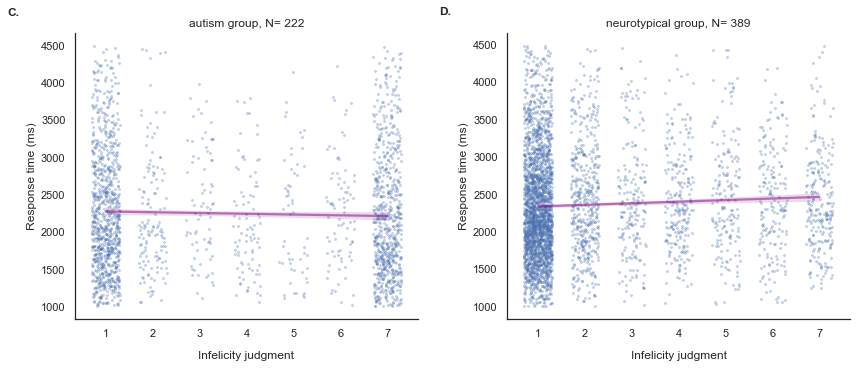

In [62]:
sns.set(font_scale=1.2)
sns.set_theme(style="white")
g = sns.lmplot(x='infelicity', y='rt', data=df.loc[(df.in_sample == True) & (df.correct == True)], col='group', x_jitter=.3, scatter_kws={'alpha': .25, 's':4}, line_kws={'color': 'purple', 'alpha': .5}, sharey=False,aspect=1)

for aa in [0, 1]:
    g.axes[0][aa].yaxis.set_label_text("Response time (ms)")
    g.axes[0][aa].xaxis.set_label_text("Infelicity judgment")
    g.axes[0][aa].xaxis.labelpad = 12
    #g.axes[0][aa].legend_.remove()


g.axes[0][0].title.set_text(f'autism group, N= {len(df.loc[(df.in_sample==True)& (df.group == "autism")].subject.unique())}')
g.axes[0][1].title.set_text(f'neurotypical group, N= {len(df.loc[(df.in_sample==True)& (df.group == "neurotypical")].subject.unique())}')

g.figure.subplots_adjust(wspace=.26)
g.axes[0][0].text(-1.1, 4900, "C.", fontsize=12, fontweight='bold');
g.axes[0][1].text(-1.1, 4900, "D.", fontsize=12, fontweight='bold');
g.figure.set_size_inches(12, 5)
#g.figure.savefig('./Figures/grpxagntxascrpt_rt_final.png', dpi=300)

g.fig.savefig('Figures/rtxinfel.png', dpi = 300)

In [66]:
import cv2

im1 = cv2.imread('../analysis/Figures/grpxagntxascrpt_rt_final.png')
im2 = cv2.imread('../analysis/Figures/infelxrt.png')
im_v = cv2.vconcat([im1, im2])
cv2.imwrite('../analysis/Figures/exp2_fig3.png', im_v)

error: OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-yvyj7qlp/opencv/modules/core/src/matrix_operations.cpp:113: error: (-215:Assertion failed) src[i].dims <= 2 && src[i].cols == src[0].cols && src[i].type() == src[0].type() in function 'vconcat'


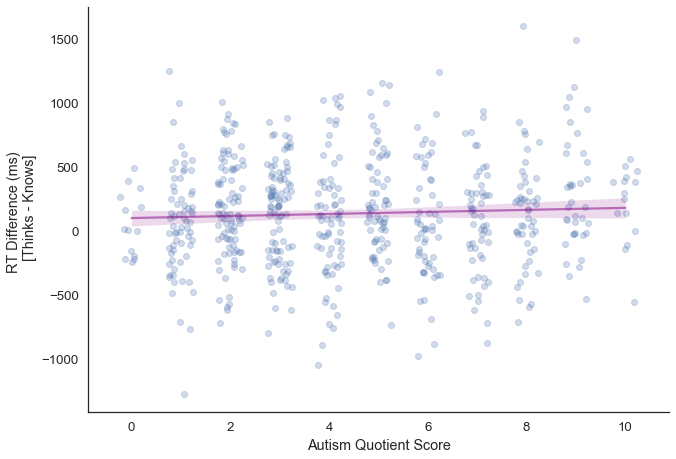

In [70]:
sns.set(font_scale=1.2)
sns.set_style("white")
aqdf = pd.read_csv("./Data/aqrtdiffs.csv", sep=',', header=0)
g = sns.lmplot(x='aq_score', y='rt_diff', y_partial='age',  data=aqdf, x_jitter=.25, scatter_kws={'alpha': .25}, line_kws={'color': 'purple', 'alpha': .5});
g.set_axis_labels(y_var='RT Difference (ms) \n [Thinks - Knows]')
g.fig.set_size_inches((11, 7))
g.set_axis_labels(x_var='Autism Quotient Score')
#g.axes[0][0].text(-7, 1500, "Knows faster...")
#g.axes[0][0].text(-7, -1110, "Thinks faster...")
g.fig.savefig('Figures/RTDiffs_AQ.png', dpi=300)

# Experiment 3


In [4]:
d3 = pd.read_csv('../OldSharedFiles/knowledgeBeforeBelief/data/study3.csv', header=0)
d3 = d3.loc[d3.condition1 != "Distractor"]
d3.drop(labels='correct', axis=1, inplace=True)
d3.reset_index(drop=True, inplace=True)
d3.rename(columns={'condition1': 'ascription', 'condition2': 'agent_state', 'code':'subject', 'RTs':'rt', 'responses': 'resp'}, inplace=True)
for old, new in {"TB":"True Info", "IG": 'Ignorance', 'FB': 'False Info'}.items():
    d3.loc[d3.agent_state == old, 'agent_state'] = new
d3['correct_answer'] = False
d3.loc[d3.agent_state == 'True Info', 'correct_answer'] = True
# checking accuracy
d3.loc[d3.resp == 'j', 'resp'] = True
d3.loc[d3.resp == 'f', 'resp'] = False

d3['correct'] = d3.apply(lambda row: row['resp'] == row['correct_answer'], axis=1)

from tqdm import tqdm
eleven = 0
d3[['accurate', 'too_fast', 'too_slow']] = False

for i, subj in tqdm(enumerate(d3.subject.unique())):
    sdat = d3.loc[d3.subject == subj]
    if len(sdat) != 12:
        print('ohshit')
        eleven += 1
    if sdat.correct.mean() >= .67:
        d3.loc[d3.subject == subj, 'accurate'] = True
    if sdat.rt.mean() < 1000:
        d3.loc[d3.subject == subj, 'too_fast'] = True
    if sdat.rt.mean() > 4000:
        d3.loc[d3.subject == subj, 'too_slow'] = True

d3['in_sample'] = False
d3.loc[(d3.accurate == True) & (d3.too_fast == False) & (d3.too_slow == False), 'in_sample'] = True
d3 = d3.loc[(d3.rt > 1000) & (d3.rt < 4500)]


150it [00:00, 729.79it/s]

ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit
ohshit


In [6]:
print(f'{len(d3.loc[d3.accurate == False].subject.unique())} subjects excluded. {len(d3.loc[d3.in_sample==True].subject.unique())} remain ') #from 30 to 40 subjs exluded

40 subjects excluded. 100 remain 


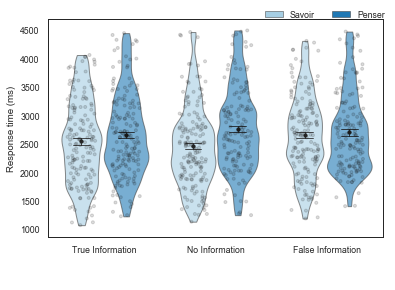

In [73]:


sns.set(font_scale=1.2)
sns.set_theme(style="white")
#sns.color_palette("Paired")
sns.set_context("paper")
g = sns.violinplot(x='agent_state', y='rt', order=['True Info', 'Ignorance', 'False Info'], hue='ascription', hue_order=['Knows', 'Thinks'] ,kind='violin', cut=0, inner=None, bw=.21, linewidth=1, saturation=1, palette="Paired", data=d3.loc[(d3.correct==True) & (d3.in_sample == True)]);

sns.stripplot(x='agent_state', y='rt', order=['True Info', 'Ignorance', 'False Info'], hue='ascription', hue_order=[ 'Knows', 'Thinks'] , color='k',size=3, dodge=True,  jitter=.25, linewidth=1, alpha=.15, ax=g.axes, data=d3.loc[(d3.correct==True) & (d3.in_sample == True)]).legend_.remove();


sns.pointplot(x='agent_state', y='rt', order=['True Info', 'Ignorance', 'False Info'], hue='ascription', hue_order=[ 'Knows', 'Thinks'], join=False, dodge=.4, capsize=.15,ci=68,errwidth=.8, ax=g.axes, scale=.6, color='k', data =d3.loc[(d3.correct==True) & (d3.in_sample == True)]);

g.axes.yaxis.set_label_text("Response time (ms)")
g.axes.xaxis.set_label_text(" ")
g.axes.xaxis.labelpad = 20
plt.legend(handles=g.axes.legend_.legendHandles[:2], labels=['Savoir', 'Penser']);
#plt.title(f'Agent State x Ascription, N={len(e1dat.subj.unique())}');
sns.move_legend(g.axes, "lower left", bbox_to_anchor=(.625, .965), ncol=2, title=None, frameon=False)
g.set_xticklabels(['True Information', 'No Information', 'False Information']);
[x.set_alpha(.6) for x in g.axes.collections[:6]]

#plt.savefig('./Figures/rtxagentxasript_exp1ab.png', dpi=100)
g.figure.savefig('./Figures/rtxagentxasript_exp3_final.png', dpi=300)


# Experiment 4

In [7]:
d4 =  pd.read_csv('../OldSharedFiles/knowledgeBeforeBelief/data/study4.csv', header=0)
d4.loc[(d4.condition1 == 'Imagine') | (d4.condition1 == 'Guess') | (d4.condition1 == 'Assume') | (d4.condition1 == 'Believe'), 'ascription'] = 'non-factive'
d4.loc[(d4.condition1 == 'Realize') | (d4.condition1 == 'Recognize') | (d4.condition1 == 'Understand') | (d4.condition1 == 'Aware'), 'ascription'] = 'factive'
d4 = d4.loc[d4.condition1 != "Distractor"]
#d4.drop(labels='correct', axis=1, inplace=True)
d4.reset_index(drop=True, inplace=True)
d4.rename(columns={'condition2': 'agent_state', 'code':'subject', 'RTs':'rt', 'responses': 'resp'}, inplace=True)
for old, new in {"TB":"True Info", "IG": 'Ignorance', 'FB': 'False Info'}.items():
    d4.loc[d4.agent_state == old, 'agent_state'] = new
d4['correct_answer'] = False
d4.loc[d4.agent_state == 'True Info', 'correct_answer'] = True
# checking accuracy
d4.loc[d4.resp == 'j', 'resp'] = True
d4.loc[d4.resp == 'f', 'resp'] = False

d4['correct'] = d4.apply(lambda row: row['resp'] == row['correct_answer'], axis=1)

from tqdm import tqdm
eleven = 0
d4[['accurate', 'too_fast', 'too_slow']] = False

for i, subj in tqdm(enumerate(d4.subject.unique())):
    sdat = d4.loc[d4.subject == subj]
    if len(sdat) != 12:
        print('ohshit')
        eleven += 1
    if sdat.correct.mean() >= .67:
        d4.loc[d4.subject == subj, 'accurate'] = True
    if sdat.rt.mean() < 1000:
        d4.loc[d4.subject == subj, 'too_fast'] = True
    if sdat.rt.mean() > 4000:
        d4.loc[d4.subject == subj, 'too_slow'] = True

d4['in_sample'] = False
d4.loc[(d4.accurate == True) & (d4.too_fast == False) & (d4.too_slow == False), 'in_sample'] = True
#d4.loc[df.rt < 1000, 'in_sample'] = False
d4 = d4.loc[(d4.rt > 1000) & (d4.rt < 4500)]

250it [00:00, 705.82it/s]


In [75]:
print(f'{len(d4.loc[d4.accurate == False].subject.unique())} subjects excluded. {len(d4.loc[d4.in_sample==True].subject.unique())} remain ') #from 52 to 84 subjs exluded
# from n=192 to 160


84 subjects excluded. 160 remain 


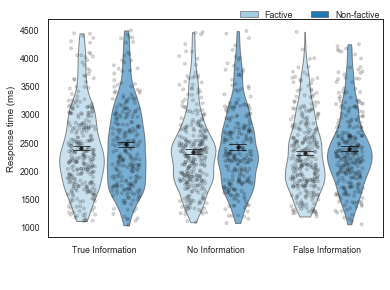

In [76]:

sns.set(font_scale=1.2)
sns.set_theme(style="white")
#sns.color_palette("Paired")
sns.set_context("paper")
g = sns.violinplot(x='agent_state', y='rt', order=['True Info', 'Ignorance', 'False Info'], hue='ascription', hue_order=['factive', 'non-factive'] , kind='violin', cut=0, inner=None, bw=.25, linewidth=1, saturation=1, palette="Paired", data=d4.loc[(d4.correct==True) & (d4.in_sample == True)]);

sns.stripplot(x='agent_state', y='rt', order=['True Info', 'Ignorance', 'False Info'], hue='ascription', hue_order=['factive', 'non-factive'] , color='k',size=3, dodge=True,  jitter=.25, linewidth=1, alpha=.15, ax=g.axes, data=d4.loc[(d4.correct==True) & (d4.in_sample == True)]).legend_.remove();


sns.pointplot(x='agent_state', y='rt', order=['True Info', 'Ignorance', 'False Info'], hue='ascription', hue_order=['factive', 'non-factive'], join=False, dodge=.4,capsize=.15,ci=68,errwidth=.8, ax=g.axes, scale=.6, color='k', data =d4.loc[(d4.correct==True) & (d4.in_sample == True)]);

g.axes.yaxis.set_label_text("Response time (ms)")
g.axes.xaxis.set_label_text(" ")
g.axes.xaxis.labelpad = 20
plt.legend(handles=g.axes.legend_.legendHandles[:2], labels=['Factive', 'Non-factive']);
#plt.title(f'Agent State x Ascription, N={len(e1dat.subj.unique())}');
sns.move_legend(g.axes, "lower left", bbox_to_anchor=(.55, .965), ncol=2, title=None, frameon=False)
g.set_xticklabels(['True Information', 'No Information', 'False Information']);
[x.set_alpha(.6) for x in g.axes.collections[:6]]

g.figure.savefig('./Figures/rtxagentxasript_exp4_final.png', dpi=300)


# Combining Exp 1-3

In [5]:
df.rename(columns={'item': 'scenario'}, inplace=True)
d3.rename(columns={'condition3': 'scenario'}, inplace=True)
e1 = e1dat[sorted(['subject', 'ascription', 'agent_state', 'rt', 'correct', 'in_sample', 'scenario'])].sort_values('subject')
e1['study'] = 'e1'
e2 = df[sorted(['subject', 'ascription', 'agent_state', 'rt', 'correct', 'in_sample', 'scenario'])].sort_values('subject')
e2['study'] = 'e2'
e3 = d3[sorted(['subject', 'ascription', 'agent_state', 'rt', 'correct', 'in_sample', 'scenario'])].sort_values('subject')
e3['study'] = 'e3'
#e4 = d4[sorted(['subject', 'ascription', 'agent_state', 'rt', 'correct', 'in_sample', 'scenario'])].sort_values('subject')
e13 =  pd.concat([e1, e2, e3] ).reset_index(drop=True)
e13

,agent_state,ascription,correct,in_sample,rt,scenario,subject,study
0,False Info,Knows,True,True,3109.0,1,A173LV77LF3SHB,e1
1,True Info,Thinks,True,True,2453.0,9,A173LV77LF3SHB,e1
2,True Info,Thinks,True,True,4000.0,3,A173LV77LF3SHB,e1
3,Ignorance,Knows,True,True,3703.0,11,A173LV77LF3SHB,e1
4,False Info,Knows,True,True,2187.0,2,A173LV77LF3SHB,e1
...,...,...,...,...,...,...,...,...
21258,False Info,Knows,True,False,3411.0,10,y1iLoFpjmBu84no1,e3
21259,Ignorance,Knows,False,False,3795.0,2,y1iLoFpjmBu84no1,e3
21260,True Info,Knows,False,False,1244.0,12,y1iLoFpjmBu84no1,e3
21261,Ignorance,Knows,True,False,3113.0,8,y1iLoFpjmBu84no1,e3


In [20]:
e13m = e13.loc[(e13.in_sample == True) & (e13.correct == True)].groupby(['study', 'subject', 'agent_state', 'ascription']).rt.mean()
e13m = e13m.reset_index()

import pingouin as pg

pg.ttest(e13m.loc[(e13m.agent_state=='Ignorance') & (e13m.ascription == 'Thinks')].rt,
         e13m.loc[(e13m.agent_state=='True Info') & (e13m.ascription == 'Thinks')].rt, paired=True)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pingouin/parametric.py:227: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.776303,2239.909894,two-sided,0.005544,"[23.24, 135.04]",0.116954,2.164,0.793296


In [15]:
df1 = pd.DataFrame(columns=['subj','TrueInfo_Thinks','NoInfo_Thinks', 'rt_diff', 'study'])

for subj in tqdm(e13.subject.unique()):
#subj = e13m.subject.unique()[100]
    a = e13.loc[(e13.subject == subj) & (e13.agent_state == 'True Info') & (e13.ascription == 'Thinks')
                & (e13.in_sample == True) & (e13.correct == True)].rt.mean()
    b = e13.loc[(e13.subject == subj) & (e13.agent_state == 'Ignorance') & (e13.ascription == 'Thinks')
                & (e13.in_sample == True) & (e13.correct == True)].rt.mean()
    if not np.isnan(a)  and not np.isnan(b):
        df1.loc[len(df1.index)] =  [subj,a, b, abs(a-b), e13.loc[e13.subject == subj].study.values[0]]
    else:
        print(f'something weird subject: {subj} from study {e13.loc[e13.subject==subj].study.values[0]}')


  1%|          | 14/1897 [00:00<00:29, 64.41it/s]

something weird subject:  A173LV77LF3SHB from study e1
something weird subject:  A2KEIZOD2NX7MM from study e1
something weird subject:  A3QBEKBOCTM7IP from study e1
something weird subject: A07527332540N4KL1PIXU from study e1
something weird subject: A1067MT5UGN from study e1


  2%|▏         | 32/1897 [00:00<00:32, 56.60it/s]

something weird subject: A14EJWSWXB60Q2 from study e1
something weird subject: A15EZJS1DRO from study e1
something weird subject: A16N8S07AKQU4M from study e1


  3%|▎         | 50/1897 [00:00<00:32, 56.32it/s]

something weird subject: A170EDGL8ZW from study e1
something weird subject: A173LV77LF3 from study e1
something weird subject: A1756XKDK4 from study e1
something weird subject: A17ITPS92UM from study e1
something weird subject: A18921EVRYF8CE from study e1
something weird subject: A18PC9QU8N3 from study e1
something weird subject: A194KANUT0C from study e1


  4%|▍         | 73/1897 [00:01<00:27, 65.15it/s]

something weird subject: A1BCRBU9PSO from study e1
something weird subject: A1BNR1ZAF1Q from study e1
something weird subject: A1BPHW0KCTG34P from study e1
something weird subject: A1C5SQZ045W from study e1
something weird subject: A1CUTEZJIWM from study e1
something weird subject: A1CVM8I2566 from study e1
something weird subject: A1D3K0VXUGW from study e1
something weird subject: A1DGADF9IEV from study e1
something weird subject: A1DGNROKR9Q from study e1
something weird subject: A1DLROKP0MY from study e1
something weird subject: A1DUH3RLI00 from study e1
something weird subject: A1EE8BV0O7 from study e1


  5%|▍         | 88/1897 [00:01<00:26, 68.54it/s]

something weird subject: A1F63RK1PMJ from study e1
something weird subject: A1FA2AJUFES from study e1
something weird subject: A1GSIR59HGF from study e1
something weird subject: A1GVNE1WGYRRF7 from study e1
something weird subject: A1GYU14L7D8 from study e1
something weird subject: A1HBIE5LRTQ from study e1


  5%|▌         | 104/1897 [00:01<00:25, 70.13it/s]

something weird subject: A1HHW2PWL27 from study e1
something weird subject: A1J9A6AK240 from study e1
something weird subject: A1JCFCPGEYT from study e1
something weird subject: A1KAEEF53CX from study e1


  6%|▋         | 121/1897 [00:01<00:24, 73.59it/s]

something weird subject: A1KU4ZJH35FVM5 from study e1
something weird subject: A1KZ6I92SWI from study e1
something weird subject: A1L1K6V3CNZJYA from study e1
something weird subject: A1MRIACTB6YVGZ from study e1
something weird subject: A1N6D9IMLNM from study e1
something weird subject: A1O67YS3DU0 from study e1
something weird subject: A1OXBE8DAVM from study e1

  7%|▋         | 138/1897 [00:02<00:23, 75.58it/s]


something weird subject: A1PMQY9CDRN from study e1
something weird subject: A1PT63J40GN from study e1
something weird subject: A1Q9UXA1K3M from study e1
something weird subject: A1QD0XE25CX from study e1
something weird subject: A1QTQISKEHW from study e1
something weird subject: A1QVNF19XSR from study e1
something weird subject: A1RXBTNW8SKR1S from study e1

  8%|▊         | 155/1897 [00:02<00:23, 74.13it/s]


something weird subject: A1S6C5E1PQE from study e1
something weird subject: A1S6C6EN8MP from study e1
something weird subject: A1SI42A7JUSYHO from study e1
something weird subject: A1SSBN3C7NE from study e1
something weird subject: A1TIV52E0VU from study e1
something weird subject: A1TRNGVZQKHM1V from study e1
something weird subject: A1VF3WAZ8YS from study e1

  9%|▉         | 171/1897 [00:02<00:22, 76.16it/s]


something weird subject: A1VMVO6MTS7Y0B from study e1
something weird subject: A1VR0H82QGG from study e1
something weird subject: A1W0BOO1N1I from study e1
something weird subject: A1W17OY3AO1 from study e1
something weird subject: A1WM4J7JJKVJ67 from study e1
something weird subject: A1WPV6J39K5 from study e1
something weird subject: A1WRYUFOYFF from study e1
something weird subject: A1X0XGWBAN6 from study e1
something weird subject: A1XKF67DMQQ from study e1


 10%|█         | 197/1897 [00:02<00:21, 78.11it/s]

something weird subject: A1YBX7P5PY8 from study e1
something weird subject: A1YGENVE7OI from study e1
something weird subject: A1ZN1LO88O5N3X from study e1
something weird subject: A1ZPYSX30BD from study e1
something weird subject: A207O698ADO from study e1
something weird subject: A20NITCOBY4 from study e1
something weird subject: A20RU9H40EONUN from study e1
something weird subject: A21753FQKCM from study e1
something weird subject: A219TF6613S from study e1
something weird subject: A21SF3IKIZB from study e1
something weird subject: A21V2QP4NFA from study e1
something weird subject: A21XD6CWE1J from study e1

 11%|█▏        | 215/1897 [00:03<00:21, 78.47it/s]


something weird subject: A221FSWO28B from study e1
something weird subject: A22XK42LSNM from study e1
something weird subject: A235JRQLU2H6KI from study e1
something weird subject: A23E20NQA7L8EZ from study e1
something weird subject: A24F1UPER62 from study e1
something weird subject: A24ZKEJTS1O from study e1
something weird subject: A256JAH0FAL9U2 from study e1
something weird subject: A269Z70PE47 from study e1


 12%|█▏        | 232/1897 [00:03<00:21, 75.91it/s]

something weird subject: A26E7OFN091 from study e1
something weird subject: A26JIHKBORI from study e1
something weird subject: A27BKFN6UB1 from study e1
something weird subject: A27L8WDICFL from study e1
something weird subject: A27PUZJTUFD from study e1
something weird subject: A27Z95LLMJ3 from study e1
something weird subject: A299CU7U9QX from study e1
something weird subject: A29IC6S1JES from study e1
something weird subject: A29PB2C8XD8 from study e1
something weird subject: A29VL3MZE7Y from study e1


 13%|█▎        | 249/1897 [00:03<00:21, 77.08it/s]

something weird subject: A2A8WB3CQ6SR81 from study e1
something weird subject: A2A9A811YTJ from study e1
something weird subject: A2ABAPXOK0K from study e1
something weird subject: A2ABXEX1189EOV from study e1
something weird subject: A2AO7QP5THY from study e1
something weird subject: A2AWDYE8TVV from study e1
something weird subject: A2BS7B4W5GC from study e1
something weird subject: A2C73Y1COWC from study e1
something weird subject: A2CH0ISUH1E from study e1


 14%|█▍        | 273/1897 [00:03<00:21, 77.00it/s]

something weird subject: A2CTNRH34WDLE7 from study e1
something weird subject: A2CVQ2E0M1T6BP from study e1
something weird subject: A2D0XTJ0PI4 from study e1
something weird subject: A2D8VRE4AGK293 from study e1
something weird subject: A2DAEM674ZD from study e1
something weird subject: A2DBMTMB6IH from study e1
something weird subject: A2E5A6OJXLGWZO from study e1
something weird subject: A2EEL9YYUHL from study e1
something weird subject: A2EI075XZT9 from study e1
something weird subject: A2FEN9G4CGJ from study e1
something weird subject: A2FFAB1JQJ4EZ2 from study e1
something weird subject: A2FUMA4UR6S from study e1
something weird subject: A2GDNJ48UD50E9 from study e1
something weird subject: A2GGVQRDAXBBR7 from study e1


 16%|█▌        | 306/1897 [00:04<00:20, 78.60it/s]

something weird subject: A2I19TY4P5I from study e1
something weird subject: A2ICAU1QCT9W11 from study e1
something weird subject: A2J9RNKXNLR from study e1
something weird subject: A2JUYWXAPL9 from study e1
something weird subject: A2JVT6YVJOB from study e1
something weird subject: A2K33A8W4Y1 from study e1
something weird subject: A2MKMYAK3QS7Z5 from study e1
something weird subject: A2OYWTFK9MC from study e1


 17%|█▋        | 322/1897 [00:04<00:20, 76.81it/s]

something weird subject: A2P0KQ5Y5QMGC2 from study e1
something weird subject: A2P2KRN6Y2C from study e1
something weird subject: A2PM8VNN0T6 from study e1
something weird subject: A2Q9YM0MB3Y72S from study e1
something weird subject: A2QENLAAFQWHPE from study e1
something weird subject: A2QG6V1C14866C A2QG6V1C14866C from study e1
something weird subject: A2QTC5EFA4J183 from study e1
something weird subject: A2R0L7YJW7B75W from study e1
something weird subject: A2RRYVYUDNK from study e1
something weird subject: A2RW1OV5XF3 from study e1
something weird subject: A2RYC4HD0JL from study e1
something weird subject: A2S4N52QRYJ1TB from study e1
something weird subject: A2SHOFSQGLTOCE from study e1


 18%|█▊        | 348/1897 [00:04<00:19, 80.80it/s]

something weird subject: A2SSC9PR4KP from study e1
something weird subject: A2SYVZTOWYM from study e1
something weird subject: A2TABC6Q4D2 from study e1
something weird subject: A2TAUP3B2QB from study e1
something weird subject: A2TQZZXEBM3 from study e1
something weird subject: A2TYLR23CHR from study e1
something weird subject: A2U0J2XUQUS39B from study e1
something weird subject: A2U8P6ZKBLW7VI from study e1
something weird subject: A2ULC7PIEJ6 from study e1
something weird subject: A2UON0N6JM7 from study e1
something weird subject: A2V2I8HXL9E from study e1
something weird subject: A2V9WQ4ZG1N from study e1
something weird subject: A2VCNB4XETP from study e1


 19%|█▉        | 366/1897 [00:04<00:19, 79.02it/s]

something weird subject: A2W4Z6GVPNC from study e1
something weird subject: A2W547SNOMC from study e1
something weird subject: A2W6ZCUCWZO92C from study e1
something weird subject: A2WDVRDUFGXPXU from study e1
something weird subject: A2WFLUGVA85 from study e1
something weird subject: A2WLGVXAVT2 from study e1
something weird subject: A2WOMBZM8FK3F5 from study e1
something weird subject: A2YHT2CVXQF from study e1
something weird subject: A2YO2QOJ31RQAV from study e1
something weird subject: A2Z11BHUBDV from study e1


 20%|██        | 383/1897 [00:05<00:19, 78.81it/s]

something weird subject: A2ZT4MTMEVS from study e1
something weird subject: A302M81U0HM from study e1
something weird subject: A321UTTHJSC5PO from study e1
something weird subject: A3389BDM4SD from study e1
something weird subject: A33G0CH0CJM from study e1
something weird subject: A33L61XKPX7 from study e1
something weird subject: A33OGLT6JLPKVH from study e1
something weird subject: A33RTACPBWA from study e1
something weird subject: A34L4JED8UA from study e1


 21%|██        | 399/1897 [00:05<00:19, 76.53it/s]

something weird subject: A35NVKW9R83 from study e1
something weird subject: A35RGUQZRI1 from study e1
something weird subject: A36SM7QM8OK from study e1
something weird subject: A36ZRUGMKQA from study e1
something weird subject: A376N72I8BE from study e1
something weird subject: A37A9AGVMHR from study e1
something weird subject: A37GJETTO0Q from study e1
something weird subject: A37ZMF70ZXSISM from study e1


 22%|██▏       | 424/1897 [00:05<00:18, 79.19it/s]

something weird subject: A3862RIFFUV from study e1
something weird subject: A38B749D9WCERC from study e1
something weird subject: A390GZR4Y99 from study e1
something weird subject: A39AABZHGL6 from study e1
something weird subject: A39BQP0TB1WFO7 from study e1
something weird subject: A39YBLQYIUB from study e1
something weird subject: A3A0X82DR5P from study e1
something weird subject: A3AP1NCEBBR8S0 from study e1
something weird subject: A3APWU3IAP402S from study e1
something weird subject: A3AQL4HS8EI from study e1
something weird subject: A3AT9S1CF9QV4K from study e1


 23%|██▎       | 440/1897 [00:05<00:19, 75.18it/s]

something weird subject: A3B58QWMTBX from study e1
something weird subject: A3B6K6TUKM2 from study e1
something weird subject: A3D79IRWTN2KGV from study e1
something weird subject: A3D9L5CQXK1 from study e1
something weird subject: A3DQR44SZEK028 from study e1
something weird subject: A3DZ46U9XRL from study e1

 24%|██▍       | 456/1897 [00:06<00:19, 73.98it/s]


something weird subject: A3E8SXH0BAY from study e1
something weird subject: A3EE9ADGWFO from study e1
something weird subject: A3FFAWIZENG from study e1
something weird subject: A3FGT6EU39C from study e1
something weird subject: A3GH7GVSCQH5V3 from study e1
something weird subject: A3GOKNZGZGH from study e1
something weird subject: A3GQ6KDIZWC from study e1
something weird subject: A3H0YTHZEHMW39 from study e1
something weird subject: A3H6C8N09ZM from study e1


 25%|██▍       | 472/1897 [00:06<00:19, 74.41it/s]

something weird subject: A3HHELRGSYT from study e1
something weird subject: A3I1W58P6SI from study e1
something weird subject: A3IADAHNMIS from study e1
something weird subject: A3IAP88BTRW from study e1
something weird subject: A3IK35A3FDW from study e1
something weird subject: A3JMD3LL6YG from study e1
something weird subject: A3JU2EB7MSHCHV from study e1
something weird subject: A3K7UC7LUKV from study e1
something weird subject: A3KCJ649H90W43 from study e1
something weird subject: A3KDSOZT1DJ from study e1

 26%|██▋       | 498/1897 [00:06<00:17, 78.16it/s]


something weird subject: A3LDI9J4FZ from study e1
something weird subject: A3LXRP2JG6JN94 from study e1
something weird subject: A3NA2MDZWEH from study e1
something weird subject: A3O81LHBBI8 from study e1


 27%|██▋       | 514/1897 [00:06<00:18, 76.74it/s]

something weird subject: A3P74FP62XN from study e1
something weird subject: A3QB0Z9AN62 from study e1
something weird subject: A3QLUERQCUX from study e1
something weird subject: A3QPUDXA11V4B3 from study e1
something weird subject: A3RIJE8G87D from study e1
something weird subject: A3RL02A3JRA from study e1
something weird subject: A3RLCGRXA34 from study e1


 28%|██▊       | 539/1897 [00:07<00:17, 79.25it/s]

something weird subject: A3TYWTLNIKK from study e1
something weird subject: A3U5CRG5S8I from study e1
something weird subject: A3U7TRQS729 from study e1
something weird subject: A3UBB1LJKDQ from study e1
something weird subject: A3UCDQLUBE20XM from study e1
something weird subject: A3VNUHANXEQD2C from study e1
something weird subject: A3VQY7RWI6MG5O from study e1
something weird subject: A3W24IE6P9O from study e1
something weird subject: A423QQ5WN43 from study e1
something weird subject: A4ZPIPBDO62 from study e1
something weird subject: A544VW8YTMP from study e1
something weird subject: A5EU1AQJNC7 from study e1


 29%|██▉       | 556/1897 [00:07<00:16, 79.56it/s]

something weird subject: A6LU9FOZ2G6T4 from study e1
something weird subject: A6YWR37KCE0AP from study e1
something weird subject: A7SBN5NWVJDX from study e1
something weird subject: A8TCR99262P from study e1
something weird subject: A8UM292EGKZ from study e1
something weird subject: A9YLTA7PS7O from study e1


 30%|███       | 574/1897 [00:07<00:16, 78.74it/s]

something weird subject: ABREDVJ6LQD from study e1
something weird subject: ACLCFPUQWV5 from study e1
something weird subject: ACWKDPFUXOD from study e1
something weird subject: ADHA4F4848R from study e1
something weird subject: AE1EFV0F152 from study e1
something weird subject: AE3DF65P9104P from study e1
something weird subject: AEQ95NMC3VX from study e1


 31%|███       | 590/1897 [00:07<00:16, 78.79it/s]

something weird subject: AF883TQ7OGV from study e1
something weird subject: AFPV9QW3SKX from study e1
something weird subject: AG20MAXFDIF5J from study e1
something weird subject: AGG5RXBTH9X from study e1
something weird subject: AGJ6958FU8A from study e1
something weird subject: AGYZ0GAAUIJ from study e1
something weird subject: AH6PQTU8QFO from study e1
something weird subject: AHJQDF8PAHV from study e1
something weird subject: AHMAH5ER3UU from study e1
something weird subject: AHSQOWJG4HA from study e1
something weird subject: AIANKPPV1PMVI from study e1


 32%|███▏      | 616/1897 [00:08<00:16, 78.03it/s]

something weird subject: AKC6351TW2F from study e1
something weird subject: AKF04DBSNC3 from study e1
something weird subject: AKG7VBOY97H from study e1
something weird subject: AKLV0WIZZ35 from study e1
something weird subject: AKPW0CO4O4L from study e1
something weird subject: AKQP8M2GR7V from study e1
something weird subject: AL2DWB1NI4Q from study e1
something weird subject: AL3UGBNTPA0 from study e1
something weird subject: AMCOGH8FALVNH from study e1
something weird subject: AMG9Y1YLBTK from study e1


 33%|███▎      | 632/1897 [00:08<00:16, 76.13it/s]

something weird subject: AMH1DKCG7LO from study e1
something weird subject: AMP04G2WY7W9D from study e1
something weird subject: AMX1C6N0OHJ from study e1
something weird subject: AN6WT1D6EQ8 from study e1
something weird subject: AN8KW9I5146RW from study e1
something weird subject: ANBP4R6F8EJMN from study e1
something weird subject: ANNOJVQG59A from study e1
something weird subject: AO7FM98CP90 from study e1
something weird subject: AO8SNKD5UFF from study e1
something weird subject: AO92NKBQUVED0 from study e1


 35%|███▍      | 657/1897 [00:08<00:16, 77.39it/s]

something weird subject: AP0WCBB9X7S from study e1
something weird subject: AQVP5IH2S6W from study e1
something weird subject: ARLSOH5YMGJ from study e1
something weird subject: ARQ9DY4UL4W from study e1
something weird subject: ASB8T0H7L99 from study e1
something weird subject: ATATCYCP7QB from study e1
something weird subject: ATFGMWXTU004O from study e1
something weird subject: ATNCWXU09OP from study e1


 35%|███▌      | 673/1897 [00:08<00:16, 76.11it/s]

something weird subject: ATSLRGR0Q49 from study e1
something weird subject: AUKUYL50PIU from study e1
something weird subject: AUMRVALFSEIKG from study e1
something weird subject: AV3CA0IYNRC from study e1
something weird subject: AWVIOLZUKBN from study e1
something weird subject: AWY68ANFRTH from study e1
something weird subject: AXQAMAX5I3R from study e1


 37%|███▋      | 698/1897 [00:09<00:15, 75.01it/s]

something weird subject: AYALPYEQ512 from study e1
something weird subject: AYCHPTQRYDT from study e1
something weird subject: AZ1L3CFI7QH5E from study e1
something weird subject: AZ4NM6ZXTGT from study e1
something weird subject: AZ9A137H25EDX from study e1
something weird subject: AZOS1CTMW0J from study e1
something weird subject: a1tgefpth2dxan from study e1
something weird subject: jarrod bailey from study e1
something weird subject: 07jgfuv0oLdIBiON from study e2
something weird subject: 0HjGKCqMwIzR0GRr from study e2


 38%|███▊      | 714/1897 [00:09<00:15, 75.98it/s]

something weird subject: 0aOYTi9KgR5WYNz9 from study e2
something weird subject: 0d15B1kPaZXl229n from study e2
something weird subject: 0qa7TbAL3UiszpZ9 from study e2
something weird subject: 0vPg7Aq5guTZgI4D from study e2
something weird subject: 0yTgIIRU9tTehmK8 from study e2
something weird subject: 1sqCg0UNSS4uNpbl from study e2
something weird subject: 1uPhIEIse54fsnaH from study e2
something weird subject: 220gokVMqu9aFIjU from study e2
something weird subject: 294zLJJRwtuPxkvo from study e2
something weird subject: 29S7RJQzzHW5gwC2 from study e2
something weird subject: 2TEudZb5ct0ebg7C from study e2
something weird subject: 2gu0WYml00E1W4Rv from study e2
something weird subject: 2s2kZo9El608uGYT from study e2

 39%|███▊      | 731/1897 [00:09<00:15, 75.73it/s]


something weird subject: 2yPXxzVkP1sGwGjK from study e2
something weird subject: 303rTbdK96wGdYy6 from study e2
something weird subject: 3EK1H8NXodVziziz from study e2
something weird subject: 3GESZ4IkjpNfvBLG from study e2
something weird subject: 3g8jgU4czRQI6j3P from study e2
something weird subject: 3itqj2guyLlgcDRJ from study e2
something weird subject: 3oMJYP7hJnsh6cs1 from study e2
something weird subject: 42Dl0Butf8W0FGAA from study e2


 39%|███▉      | 747/1897 [00:09<00:15, 74.15it/s]

something weird subject: 49Bnhz7O7dr27cUW from study e2
something weird subject: 4HSC5wm5sETANT30 from study e2
something weird subject: 4adBkNUI2WZLgxB2 from study e2
something weird subject: 4hUni3XeIkJeUYK3 from study e2
something weird subject: 4jZBBnVZ3hK9FXBX from study e2
something weird subject: 4k3WDuCJHJrEdokS from study e2
something weird subject: 4ncVsotdum1fUiVh from study e2
something weird subject: 4yPm7VTIs2Fa6c7S from study e2
something weird subject: 546e3778fdf99b2bc7ebcff6 from study e2


 41%|████      | 773/1897 [00:10<00:14, 77.36it/s]

something weird subject: 561e760fed6e5a000dc7e7ba from study e2
something weird subject: 562563ceed6e5a000bc7f386 from study e2
something weird subject: 56259489ed6e5a0005c80fde from study e2
something weird subject: 5652186a812a980012fe65ce from study e2
something weird subject: 5669ac845bd4ff0011159b4a from study e2
something weird subject: 56849d528f456f000c45e1dd from study e2
something weird subject: 56bae08f30d6b30005f8537a from study e2
something weird subject: 56d1af6521cd29000b973ff2 from study e2


 42%|████▏     | 797/1897 [00:10<00:14, 77.34it/s]

something weird subject: 58060d08b869700001d70b8c from study e2
something weird subject: 58578946c41fd90001434680 from study e2
something weird subject: 58a623e90da7f10001de8553 from study e2
something weird subject: 58ab2db50da7f10001de8e34 from study e2


 43%|████▎     | 821/1897 [00:10<00:14, 76.72it/s]

something weird subject: 59565b1bbbb52400017ad4e1 from study e2
something weird subject: 59ff81fd5d06850001afeeab from study e2
something weird subject: 59ffb939517dfb00013dadda from study e2
something weird subject: 5NCJZGDyhHBoN2wk from study e2
something weird subject: 5a5479b4ac56240001537ffa from study e2
something weird subject: 5a638189c0d836000107b798 from study e2


 45%|████▍     | 846/1897 [00:11<00:13, 77.39it/s]

something weird subject: 5b15307351caaf0001228d9b from study e2
something weird subject: 5b79bd77c4e6ad0001d2f312 from study e2
something weird subject: 5bbf523d83f9790001ce549a from study e2
something weird subject: 5c0fcccc1f6f150001487111 from study e2


 45%|████▌     | 862/1897 [00:11<00:14, 71.59it/s]

something weird subject: 5c12f56a11fe9a00013d5854 from study e2
something weird subject: 5c36c5a851707e0001cd533d from study e2
something weird subject: 5c5198da659655000168955d from study e2
something weird subject: 5c52f898110c55000144bf18 from study e2
something weird subject: 5c55c45f53fba80001bcf323 from study e2


 46%|████▋     | 878/1897 [00:11<00:16, 63.10it/s]

something weird subject: 5c8f224c9d2bff0001867ce2 from study e2
something weird subject: 5c910fd97a7067001690a0a0 from study e2
something weird subject: 5ca8f48c5689db001729e1f4 from study e2


 47%|████▋     | 893/1897 [00:11<00:14, 68.06it/s]

something weird subject: 5d1d13c26ce490001692baa2 from study e2
something weird subject: 5d1e5ece2e9ac30016b522c5 from study e2
something weird subject: 5d29d6bd30fa6f0015cd4a75 from study e2
something weird subject: 5d2f054b1dde3600015e43d9 from study e2
something weird subject: 5d327e87ce28af0017ec788a from study e2
something weird subject: 5d367cdfc8462a0001a7a96b from study e2
something weird subject: 5d69678bf4d251001c0f81f3 from study e2
something weird subject: 5d6f332829c25100188a4a27 from study e2


 48%|████▊     | 917/1897 [00:12<00:13, 74.48it/s]

something weird subject: 5db4ef4a2986a3000be1f886 from study e2
something weird subject: 5dbb9407e0a6e81863526af7 from study e2
something weird subject: 5dbf75c626c04c401a4fbf25 from study e2
something weird subject: 5dcccec0092079953154f997 from study e2
something weird subject: 5dceca2541afe801a32e27ac from study e2
something weird subject: 5dcf402982569a08ddd84086 from study e2
something weird subject: 5dd00a19b51b3e103a6f50c8 from study e2
something weird subject: 5dd5ff2080123f5afc05fe82 from study e2
something weird subject: 5dd72efa82569a6d38e06854 from study e2
something weird subject: 5dd9923922749791b319fc19 from study e2
something weird subject: 5ddd1dd2b48da3c63a3ccdbb from study e2


 49%|████▉     | 933/1897 [00:12<00:12, 74.71it/s]

something weird subject: 5dea76e109c1071948aed0ff from study e2
something weird subject: 5e09ffd8fa3d102a583771c1 from study e2
something weird subject: 5e24fbd4e1f467771c234e5f from study e2
something weird subject: 5e29dc4721a5f20481c70274 from study e2
something weird subject: 5e2f15bb8028224dd1dd90c9 from study e2
something weird subject: 5e307edef5abed05e1736185 from study e2


 51%|█████     | 958/1897 [00:12<00:12, 77.40it/s]

something weird subject: 5e3f778e91be661ca60e3540 from study e2
something weird subject: 5e428b48902afe117c45d261 from study e2
something weird subject: 5e445469951000017c34358e from study e2
something weird subject: 5e46d70ab1f1c5000d96800d from study e2
something weird subject: 5e6fd3293c76d25a3ca8b384 from study e2
something weird subject: 5e7146ee69a3f1061774803b from study e2
something weird subject: 5e7e0e92b7838b4aca1b6fca from study e2
something weird subject: 5e830a42b7a9de01dbe5a430 from study e2


 51%|█████▏    | 974/1897 [00:12<00:12, 75.58it/s]

something weird subject: 5e9a2251a69f690b9cc31ede from study e2
something weird subject: 5ef4db1a45dfc00e117b2a54 from study e2


 53%|█████▎    | 998/1897 [00:13<00:11, 76.43it/s]

something weird subject: 5f0e9896f5e4e11e12c8f5ac from study e2
something weird subject: 5f11f98efbaf2b0ef855ec6b from study e2
something weird subject: 5f2fc0f05b67073c177aaece from study e2
something weird subject: 5f3153a6180dcf0d8dd72a45 from study e2
something weird subject: 5f4348be761e0a593fde3875 from study e2


 53%|█████▎    | 1014/1897 [00:13<00:11, 74.70it/s]

something weird subject: 5f878ac24e7e5f1ba4237c09 from study e2
something weird subject: 5f988a053b4bf5186a5d6693 from study e2


 55%|█████▍    | 1039/1897 [00:13<00:11, 76.02it/s]

something weird subject: 5fe146b36a3657bd99f9c179 from study e2
something weird subject: 5fee0c90eb52700cd9752702 from study e2
something weird subject: 5lopLBh153Qpw1nr from study e2
something weird subject: 5sydpWckv2QiT8Yc from study e2
something weird subject: 5uBpu6wtDQqFqUCy from study e2
something weird subject: 6004d931c4ea7f3205445823 from study e2
something weird subject: 6009eee6721c400d92d4cd39 from study e2
something weird subject: 600c167e28de48080e812884 from study e2


 56%|█████▌    | 1056/1897 [00:14<00:11, 75.78it/s]

something weird subject: 60242e8abb3a690ada256676 from study e2
something weird subject: 6036f9b3b1842f8b659b18c7 from study e2
something weird subject: 604bfe99dcaa286218d25fca from study e2
something weird subject: 6054e1ddb68b58dd23242765 from study e2
something weird subject: 605fe9680cac2ea943d411ec from study e2
something weird subject: 606a3cf263a18869ac8ee0ed from study e2
something weird subject: 606be72bace337114c3765ba from study e2
something weird subject: 607ec99a0e2f8caf3de9f839 from study e2
something weird subject: 608463432ad9e5774c98b317 from study e2


 57%|█████▋    | 1072/1897 [00:14<00:10, 75.63it/s]

something weird subject: 60a7c4434b322876925afaa3 from study e2
something weird subject: 60bc011503db109b7d46851d from study e2
something weird subject: 60c14a3e834adb62102cffa0 from study e2
something weird subject: 60dc4e2299f89a7ca94b2c91 from study e2
something weird subject: 60ddf4b3e6b47e907bd5e6b9 from study e2


 58%|█████▊    | 1096/1897 [00:14<00:10, 75.26it/s]

something weird subject: 60f09796c2a24694ff43f6b7 from study e2
something weird subject: 60f1faa39def9e1f15734734 from study e2
something weird subject: 60fcd2fa241e2b1d59c0c8d8 from study e2
something weird subject: 60ffa146784103f75aadb045 from study e2


 59%|█████▊    | 1112/1897 [00:14<00:10, 74.75it/s]

something weird subject: 6107f7ea53aa87491213602b from study e2
something weird subject: 610c33fa86d4d9bbc1345e36 from study e2


 59%|█████▉    | 1128/1897 [00:15<00:10, 73.76it/s]

something weird subject: 610e628bb9ef91fb413c9865 from study e2
something weird subject: 610f00e129aaf4f850d419da from study e2
something weird subject: 6111234ac8cfa49e38acbfb4 from study e2
something weird subject: 611dc137b04afe942ca61dac from study e2


 61%|██████    | 1153/1897 [00:15<00:09, 76.53it/s]

something weird subject: 61267bcd72257ca236f7f7a7 from study e2
something weird subject: 61292a3404d387db5b0b2a32 from study e2
something weird subject: 61412d50c1d83f94e448c0f3 from study e2
something weird subject: 614918a6dcc9c2fb0bde6331 from study e2
something weird subject: 614bbf1e7de43dee7386fe3f from study e2
something weird subject: 614dee533a453a96facba70b from study e2
something weird subject: 615dd0b0a024ba4f4b4f7c24 from study e2

 62%|██████▏   | 1169/1897 [00:15<00:09, 74.65it/s]


something weird subject: 615f5cae42df61c24539d5b5 from study e2
something weird subject: 616cda4e2f5f884cdd46b2eb from study e2
something weird subject: 616ed044985dca605e572d22 from study e2
something weird subject: 616f727b03e888e0f8213eec from study e2
something weird subject: 61729e07e7b9b645c1741ca9 from study e2
something weird subject: 620bde55a922fc3f247f6e52 from study e2
something weird subject: 6234afc11b0f28d2f618991c from study e2
something weird subject: 62373694c3277138c1284e44 from study e2

 63%|██████▎   | 1186/1897 [00:15<00:09, 75.28it/s]


something weird subject: 6237e3dd84d00736f51ed0e4 from study e2
something weird subject: 62448f31d583f12a4bf7d2b2 from study e2
something weird subject: 62718acba39cea360d198b7d from study e2
something weird subject: 6272ab12b3d9c61d2271db8d from study e2
something weird subject: 62740cf8e39eba1055ef571b from study e2
something weird subject: 627448a7458cf55c0cdea3bb from study e2
something weird subject: 627a9d96d7f53211c49629aa from study e2


 63%|██████▎   | 1203/1897 [00:16<00:09, 74.34it/s]

something weird subject: 628550405e40bb2b23ac629f from study e2
something weird subject: 628817a3c518b074f426f27d from study e2
something weird subject: 6289862b737e6a4af1a6eb78 from study e2
something weird subject: 628bbe2c0f8080e6985e8592 from study e2
something weird subject: 628f6c6de40990241b09293c from study e2
something weird subject: 628fa75dcf7f7273127b4614 from study e2

 64%|██████▍   | 1219/1897 [00:16<00:09, 74.91it/s]


something weird subject: 6290bd6cb41df7d86254b2ae from study e2
something weird subject: 6294bdac3f1ed08e968e53bf from study e2
something weird subject: 6295417c366a7be1b51f05bb from study e2
something weird subject: 62961c550afbc1e11a77a4f4 from study e2
something weird subject: 6296267b2ae249a205d319d3 from study e2
something weird subject: 6296295f57c07906c9052955 from study e2


 65%|██████▌   | 1235/1897 [00:16<00:08, 74.12it/s]

something weird subject: 6297a75cd3f65c8152c48c2d from study e2
something weird subject: 62a2028eae52642510f06699 from study e2
something weird subject: 62a227225db04eb9270b0343 from study e2
something weird subject: 62a8947a2f94e7cf24241ba3 from study e2
something weird subject: 62a89720f86a36ab14c1ac9c from study e2
something weird subject: 62aa26e333b0fca51f65d3ac from study e2
something weird subject: 62aa4399fa1aadf5ab91fff8 from study e2


 67%|██████▋   | 1278/1897 [00:16<00:07, 78.68it/s]

something weird subject: 630NwJbRNW8XkqSg from study e2
something weird subject: 65cEKE2Km7SUnP1O from study e2
something weird subject: 67BWmQEElwLjH9mz from study e2
something weird subject: 6NFO0fwloODRxHLh from study e2
something weird subject: 6S1AlBHaZjP28v90 from study e2
something weird subject: 6ZS4cp3tpOyo2K6V from study e2
something weird subject: 6bOPCPGjuAGOA3Aj from study e2
something weird subject: 6dPUKBuT4nsAN7jn from study e2
something weird subject: 6rpTifnEP1ODm3XI from study e2
something weird subject: 6v05P7Bu9XTDzmlJ from study e2
something weird subject: 6ySSW87zJ5BprkpP from study e2
something weird subject: 79xwUHV8ffUVxuWx from study e2
something weird subject: 7BaMkNlDBvMih6Gw from study e2
something weird subject: 7jnss7yTlQjGJzLh from study e2


 68%|██████▊   | 1294/1897 [00:17<00:07, 77.39it/s]

something weird subject: 7m90VP0ptoKUVKR8 from study e2
something weird subject: 8K88JhTAxj2embQg from study e2
something weird subject: 8zGWMosbL9JpEH3v from study e2
something weird subject: 992WgQBLMLyMZ37Y from study e2
something weird subject: 9KMXlpO6tid1JyV7 from study e2
something weird subject: 9LVjBYA0JYjW0ijS from study e2
something weird subject: 9TBpeN3avEf1HwoE from study e2
something weird subject: A1Hx6t17gg8w6Bg2 from study e2
something weird subject: A2kpeYeCazr9dV3w from study e2
something weird subject: AFPHENsl7f8zLXY1 from study e2
something weird subject: ALFQUcHwlbLrZIRN from study e2
something weird subject: AOQNH8YLF2QqbM7T from study e2
something weird subject: B3m5c2V40jTUVlsA from study e2


 69%|██████▉   | 1311/1897 [00:17<00:07, 76.08it/s]

something weird subject: BGR8SbcmSKmBFxhT from study e2
something weird subject: BH1umRMAhNkKFBPs from study e2
something weird subject: BRcDCRzh1jas8BHn from study e2
something weird subject: BSgRkwVkvdsAvpg8 from study e2
something weird subject: BjBcYzIYMyoMJeAj from study e2
something weird subject: BpMuPT577yRBN1Jx from study e2
something weird subject: C1zdHKkC6MXCNA9D from study e2
something weird subject: CBLW5WoxdcdB1XVJ from study e2
something weird subject: CCMAtpsJNtCdGXpF from study e2
something weird subject: Cf5f0uzSGv1uZPGk from study e2
something weird subject: ChAOYjRs9D3lxlqb from study e2

 70%|██████▉   | 1327/1897 [00:17<00:07, 75.27it/s]


something weird subject: CiRac6WKcEji2ZUO from study e2
something weird subject: CkufP3cLqcpiUQkN from study e2
something weird subject: CrED4PrZc3VXMC62 from study e2
something weird subject: CvPDV8BhpBWfDv1u from study e2
something weird subject: CzbJpctJwyi6cxoB from study e2
something weird subject: D22fJFdV8VbMRgua from study e2
something weird subject: D28bbmWpozBIURlv from study e2
something weird subject: D858nGJo7ABK83Tb from study e2
something weird subject: D8az33uQG0atIvHY from study e2
something weird subject: DAV4K7YLKtIW7TVF from study e2
something weird subject: DJX7wqjxp2BCcGpE from study e2
something weird subject: Do5mNBOfp7PwAS8C from study e2
something weird subject: DxEoGsY7BhLDkdv0 from study e2

 71%|███████   | 1343/1897 [00:17<00:07, 73.62it/s]


something weird subject: EFR206VAgPVnzbVU from study e2
something weird subject: EMjfZEVvD3pR0lUf from study e2
something weird subject: EgKXjWF1h8Ym8bKQ from study e2
something weird subject: FBjwlD5kixpfdhtT from study e2
something weird subject: FJY5GXR0epcoYMBC from study e2
something weird subject: FS5ruWEslOTyUc28 from study e2
something weird subject: FsxERvlgLQYvpY5E from study e2
something weird subject: G2XJTYBWihorZBcQ from study e2
something weird subject: GBvjAMgwb6pw8l7I from study e2
something weird subject: GIqGnnvzQGrvUu3B from study e2

 72%|███████▏  | 1360/1897 [00:18<00:07, 75.83it/s]


something weird subject: GKK8ZMnKjOSKzxm9 from study e2
something weird subject: GLEnggxjtkzOiadn from study e2
something weird subject: GujduSgNoWM3TNrP from study e2
something weird subject: Gw1sSTVBktJV76CH from study e2
something weird subject: H5w54f5HyacDqwPX from study e2
something weird subject: H9N6MUM2lPFB0kBv from study e2
something weird subject: H9uROAe4kjelWt2E from study e2
something weird subject: HSckfN0VKmylAoVI from study e2
something weird subject: HV9MEzNWHfdPuSDu from study e2
something weird subject: HfAXrMh1g7D0Vfpz from study e2
something weird subject: I8vf6AxaRzXJeCY5 from study e2
something weird subject: IEivv6KxPkNvzWJz from study e2
something weird subject: IKH9fxfU1yN7jicH from study e2

 73%|███████▎  | 1377/1897 [00:18<00:06, 76.41it/s]


something weird subject: IcbFIJoDXQLoAPKR from study e2
something weird subject: ItQdCUhyvDYOa5mT from study e2
something weird subject: IwytMJz3o2iKZZyz from study e2
something weird subject: IyagFJTk0BRtPcJJ from study e2
something weird subject: J0apkpJLGuuhAIxl from study e2
something weird subject: J4DEQ0I1rtSPuzIl from study e2
something weird subject: JJFcUt00S9O6mKnc from study e2
something weird subject: JLF145NNtRAgJVsx from study e2
something weird subject: JPQWJqBbAEliEI1g from study e2
something weird subject: JQ09l0RSrDW5Wu5E from study e2
something weird subject: JVpNaHGVuCHeedPv from study e2
something weird subject: JcCbXRVhdaz5S57g from study e2
something weird subject: Jvj2GyIwEvFEA9PW from study e2

 73%|███████▎  | 1394/1897 [00:18<00:06, 77.86it/s]


something weird subject: JzcEwQyRIKWuNRlN from study e2
something weird subject: KCaAj8qEtga2Sd6l from study e2
something weird subject: KP9c1AipBmyheTNd from study e2
something weird subject: KcFVCOcOxwVW1xpt from study e2
something weird subject: KldU5Wytqo1XIFcR from study e2
something weird subject: KlgTJ1LBuDkxThtf from study e2
something weird subject: KmAwR3A4yBeW5q9E from study e2
something weird subject: LGRQPGWStHXSV6gt from study e2
something weird subject: LTaF877e3SLpjtwQ from study e2

 74%|███████▍  | 1411/1897 [00:18<00:06, 78.07it/s]


something weird subject: MBpvi68D7sir2Cdi from study e2
something weird subject: MCSznbkhSj2V9LzI from study e2
something weird subject: MQHr6rhyYjwNisMl from study e2
something weird subject: MQLPMY7Yka5vGdTJ from study e2
something weird subject: MbxmT1SA85bsPwRZ from study e2
something weird subject: Mj39AJg4c9PYhQTW from study e2
something weird subject: Mjv0HImNSULG1nep from study e2
something weird subject: NJsc8GpT9gKoaaPZ from study e2
something weird subject: Nvn6VESMAeeevvwu from study e2
something weird subject: NwzJ2tGJaPVvNUUB from study e2
something weird subject: O1g9thujcrMDSw6c from study e2


 76%|███████▌  | 1436/1897 [00:19<00:05, 79.08it/s]

something weird subject: ODw6HFdaFxn0KKNj from study e2
something weird subject: OG3jXdzjD2CVs4IC from study e2
something weird subject: OLeWZgvhGjpkzecO from study e2
something weird subject: OPx1vHoQ23f050Dx from study e2
something weird subject: OfzsGLC7gUfq3Gw7 from study e2
something weird subject: Om1eIZaHMxlcK3VW from study e2
something weird subject: OtnnMKH7xhO9H3bn from study e2
something weird subject: PBqnaBFfJZMRQKGN from study e2
something weird subject: PQIwZIBRQqMfxDlk from study e2
something weird subject: PQRbbMqEcmZAYNSW from study e2
something weird subject: PUmaNvEjYf6z1JvV from study e2
something weird subject: PjmyzBq9XUOHAe9V from study e2
something weird subject: PmOvzXZ1By4SxAuH from study e2
something weird subject: PooE928nGPpvApnX from study e2
something weird subject: PqJt012cv76IgqOu from study e2
something weird subject: QGAYw9Zt2wP64BoE from study e2
something weird subject: QHzWyAr20rq47My9 from study e2
something weird subject: QdIhRWyiQUxDJiru from s

 77%|███████▋  | 1453/1897 [00:19<00:05, 77.63it/s]

something weird subject: QvfW3HCfXAWua7cG from study e2
something weird subject: R1ltDlOA68acyRjh from study e2
something weird subject: RRVDzHttaVzP4KjP from study e2
something weird subject: Rsi1hbN0iG5mCdDy from study e2
something weird subject: RvDG1maE4WOhatLG from study e2
something weird subject: SVmcTWhAgIsgYowe from study e2
something weird subject: SevLhdjYIhsXlr36 from study e2
something weird subject: So8GNDLuppjYEJCB from study e2
something weird subject: St1jG6FPeSTl0M1S from study e2


 77%|███████▋  | 1469/1897 [00:19<00:05, 77.12it/s]

something weird subject: T2OSkMmZ7vw9TNRa from study e2
something weird subject: T4FKizhNcvSaWQkp from study e2
something weird subject: TCiQjTaDezqxS92S from study e2
something weird subject: TQ1CpIa5GUIs9GxO from study e2
something weird subject: TgtFwAR5Zz6yDPIT from study e2
something weird subject: Trqg24Tcle9cFZMs from study e2
something weird subject: TsAj2HlgYGLpMdvp from study e2
something weird subject: UFVFGdSQRlJRAdoI from study e2
something weird subject: UL3XPE1aLdQRYMDG from study e2
something weird subject: USQm7PxukTHYWk5J from study e2


 78%|███████▊  | 1486/1897 [00:19<00:05, 77.35it/s]

something weird subject: UxdJDBRXuvXLAtvd from study e2
something weird subject: UySry6KDeDK6Lj5m from study e2
something weird subject: V5NILgi9X1v5sETR from study e2
something weird subject: V5W2qqlztf4XZmOZ from study e2
something weird subject: VPOxgS04ZyKkq8mS from study e2
something weird subject: VUuQscJ6CJp3qFGU from study e2
something weird subject: VxodGf0CEmp0i4dr from study e2
something weird subject: W2XDtXUU2s8YO6eI from study e2
something weird subject: WD6ppl64vA94cZVd from study e2
something weird subject: WaNxXrpdjGNclSdh from study e2
something weird subject: WbhaVyXNkBQv3blX from study e2

 79%|███████▉  | 1502/1897 [00:19<00:05, 75.15it/s]


something weird subject: WbrKw5j9aDSm9zfn from study e2
something weird subject: WetHsOTDi9we82cw from study e2
something weird subject: XRfsxHkZOBofULyC from study e2
something weird subject: XS6EszTRzYaBn4vB from study e2
something weird subject: XXl0SC9SMLX8VHdZ from study e2
something weird subject: XhuVM9ogPhVpCHIP from study e2
something weird subject: Xle84hD9JPAFJ7D1 from study e2
something weird subject: XuJONY83Nqx1yJVF from study e2
something weird subject: YJJjmoktzuhKpelQ from study e2


 80%|████████  | 1518/1897 [00:20<00:05, 74.25it/s]

something weird subject: YLnetpfvM2ADIcdl from study e2
something weird subject: YRf30el5Emv4yoH7 from study e2
something weird subject: YU91zpvdxIU3vszd from study e2
something weird subject: YUFLlfuD9YBCTBPm from study e2
something weird subject: YV94r7fWM0kz1Mns from study e2
something weird subject: YaP7NtfnwX3OMhVB from study e2
something weird subject: YeTwRyXG7VMQxfle from study e2
something weird subject: YzDHvOKdkmX0TKNM from study e2
something weird subject: Z75kWVuwJy66giWk from study e2
something weird subject: ZBiEnQhTAuccYT63 from study e2
something weird subject: ZIPAwUhJK5y9zxVa from study e2


 81%|████████  | 1534/1897 [00:20<00:04, 73.79it/s]

something weird subject: a7ZlArjB3QhDnwGm from study e2
something weird subject: aGD2DDTQJ5JPa5Tl from study e2
something weird subject: aW9KQk7PmTqjIGmm from study e2
something weird subject: aYWwjgYsFhYZVMka from study e2
something weird subject: abIYhw8ZBmeydFJ5 from study e2
something weird subject: ao1Lvx6LiUP3bgAh from study e2
something weird subject: b82bFVhEIr4cXT7t from study e2
something weird subject: bBpIgPEOA9IIneUV from study e2
something weird subject: bGQimksgDAsMHxhp from study e2
something weird subject: bRG0AJMamOhx4TJr from study e2
something weird subject: bX8mhP1GgdZZlFNK from study e2
something weird subject: bvn9hdyAjK2E5cMe from study e2
something weird subject: c4nAc5yAn42S4WtD from study e2
something weird subject: c4sOfk87zo9tMqjj from study e2

 82%|████████▏ | 1551/1897 [00:20<00:04, 77.20it/s]


something weird subject: cA37SL4E13VNNXxJ from study e2
something weird subject: cFfbXhnhxL0CWq7t from study e2
something weird subject: cHIEzl5rRXcHB8xE from study e2
something weird subject: cLqef7SpGzuhaFZ5 from study e2
something weird subject: cNTkuydyXQRkNDrW from study e2
something weird subject: cg08BE4LQw5wLNHV from study e2
something weird subject: cgND5CJATWlUU9bK from study e2
something weird subject: co1VBkLjDPEyEKhZ from study e2
something weird subject: d4QC30e0P6y2w3EI from study e2
something weird subject: dCvavfRo3wa1FMHa from study e2
something weird subject: dDvpuJTjuoTHcxLs from study e2
something weird subject: dNR4YIXgLpUy0kFF from study e2

 83%|████████▎ | 1568/1897 [00:20<00:04, 77.55it/s]


something weird subject: dXdPnt5fPzQsndlu from study e2
something weird subject: dceBwxk2gKYJrm0x from study e2
something weird subject: dkjulk2GOTIxr7cW from study e2
something weird subject: dtU4I7dERQpf418g from study e2
something weird subject: dtpzd9VCKOnHYjZf from study e2
something weird subject: e3luDv8udxmc866j from study e2
something weird subject: e5wcgxhQF4VpVbrq from study e2
something weird subject: eFA8GI3MDQKKJoTe from study e2
something weird subject: eGG4MFPSIsD8sUG1 from study e2
something weird subject: efxePZy2TmylZvYs from study e2
something weird subject: ei4qkoJxa8ixfHxv from study e2
something weird subject: f4UycDzZ9jiZEqPB from study e2
something weird subject: fDKqnfvTD1mCwPZY from study e2
something weird subject: fF07C9LO2b55eZoN from study e2


 84%|████████▎ | 1584/1897 [00:20<00:04, 76.35it/s]

something weird subject: fJtyP4UAXPTD7BB4 from study e2
something weird subject: fVLBTRJKiALd0Dyp from study e2
something weird subject: fpqh9UhZFryrCmba from study e2
something weird subject: g24KOcmTXGAGwzaJ from study e2
something weird subject: gL7LCKcWuPlHMAWa from study e2
something weird subject: gOLmnTZcduJPTCCL from study e2
something weird subject: gSO8IXfUB7oFiGkJ from study e2
something weird subject: gnAvMTHvRfdrsHMu from study e2
something weird subject: gqfM9kMNKtIlEidV from study e2
something weird subject: gtwKNJ8BaOEOVBTI from study e2
something weird subject: h81jSx4YqvDtdMCQ from study e2
something weird subject: hABQQdXLdjpx0p4X from study e2
something weird subject: hJEd4F9ccB4fef7V from study e2
something weird subject: hV1fjwkLuVV2JWd5 from study e2
something weird subject: hVCdI5BSKSmN0xVQ from study e2


 85%|████████▍ | 1610/1897 [00:21<00:03, 80.02it/s]

something weird subject: hbvHacGJQaKQFEfa from study e2
something weird subject: hr8tKvme8h8ZwSNj from study e2
something weird subject: hz9yJL82UPCK7D74 from study e2
something weird subject: iDYLksVWLYZODDoj from study e2
something weird subject: iajnwheKt42Y1U3Q from study e2
something weird subject: inQ0vavvvRUuLatv from study e2
something weird subject: j3bSRo3xqKoXynqP from study e2
something weird subject: jFw2fxuNGkcOJv4W from study e2
something weird subject: jGclwYe0dbAvzbhW from study e2
something weird subject: jJsnPKdv6COjkHVh from study e2
something weird subject: jKeGjoEdFYHpsSC5 from study e2


 86%|████████▌ | 1628/1897 [00:21<00:03, 79.31it/s]

something weird subject: jyArht6aMg9sIsTh from study e2
something weird subject: kP4kACugHBUtC328 from study e2
something weird subject: kZUWmowICYNLtKo2 from study e2
something weird subject: kabTrKBAY7k7K9FG from study e2
something weird subject: ks8ZKLa2CqL5DgIt from study e2
something weird subject: lV2IBIlb0iBKylkk from study e2
something weird subject: lZjdDwEQwODvXHXm from study e2
something weird subject: ls8athspeMbwQMiM from study e2
something weird subject: lyoxKxQx7PRBl55E from study e2
something weird subject: m1nCMfEG7rBA30ch from study e2
something weird subject: m2Vdjj2wEFtdHKvi from study e2

 87%|████████▋ | 1644/1897 [00:21<00:03, 77.97it/s]


something weird subject: m62ud8ZUzVdutaPL from study e2
something weird subject: m9fo1lCX11araNbe from study e2
something weird subject: mKdZuWEMostpXNpk from study e2
something weird subject: mNFAlBS5mGqLusnu from study e2
something weird subject: mTGgBp10CUFts8Ax from study e2
something weird subject: moAQFjf6wMHUHfvV from study e2
something weird subject: n75Ba6njn5rOidB0 from study e2
something weird subject: nH19rSjliWmN8OkK from study e2
something weird subject: nMLis3wd7FgKc8cp from study e2
something weird subject: nOZbU99XnMy4CX4W from study e2
something weird subject: nWC0WcrX0wO6GohA from study e2
something weird subject: nk7Rwf3cCoCZzqyn from study e2
something weird subject: o5TTptvqAXyHA5eT from study e2
something weird subject: oCDG3LmBJJx97mqe from study e2


 88%|████████▊ | 1661/1897 [00:21<00:03, 77.69it/s]

something weird subject: oTn2zYhSl5mr8WIc from study e2
something weird subject: obBGI8DJlAfVfxLR from study e2
something weird subject: oleSxl0KDUxswhKk from study e2
something weird subject: olqZGJOcrDcriAau from study e2
something weird subject: oqY98iF1rgKbQmJt from study e2
something weird subject: oy4kM6pKMkrBth9D from study e2
something weird subject: pBm5vabUIWj75Bxt from study e2
something weird subject: pFbCAZBaoP6hlSJa from study e2
something weird subject: pPwzP8OaMb1nV9j2 from study e2
something weird subject: pY5Q5OH5PhYcbpR0 from study e2
something weird subject: pbAm0RBkSlRpGzAM from study e2
something weird subject: pkYayFhNzLgtMl9u from study e2
something weird subject: pld2Zpgp1RSgCdKO from study e2
something weird subject: pu2refO9bcmIH1Mq from study e2


 89%|████████▊ | 1679/1897 [00:22<00:02, 78.93it/s]

something weird subject: pzfOlf2tU9VNQu0U from study e2
something weird subject: qRGfYNvJPLJoaShB from study e2
something weird subject: qw4451YrA5ATrIC0 from study e2
something weird subject: r30zZiEHboUYK1gm from study e2
something weird subject: r7UWVJR65XutBFVk from study e2
something weird subject: rUfzLQjYcMrv4hRd from study e2
something weird subject: roW2zH4T3nEXc5Dr from study e2
something weird subject: rs2fG4BbMaFlPkTt from study e2
something weird subject: s5yuroDTjiogxNRE from study e2
something weird subject: sHHhYE9um0OwicFr from study e2
something weird subject: sTENmV1907VFuzRR from study e2
something weird subject: sWJnhohOyt4touwR from study e2
something weird subject: t671CrzD4Dp9i20l from study e2

 89%|████████▉ | 1696/1897 [00:22<00:02, 79.56it/s]


something weird subject: t81e8fGsZk84kGsV from study e2
something weird subject: tNSf4tJEDkfXNaoE from study e2
something weird subject: tQqVjA4A0gbVZP5E from study e2
something weird subject: tVbmvqhyHkWBhWAz from study e2
something weird subject: taawRCon5O6QXlij from study e2
something weird subject: tdeNHgoPud0aWlLY from study e2
something weird subject: tko0BCQynefQRlUn from study e2
something weird subject: uJ1QiDB13WWlRn3F from study e2
something weird subject: uLArI30YOgo1PtAV from study e2
something weird subject: uQpMp8qipOPAesFk from study e2
something weird subject: uiUytkEfdMlNM5YB from study e2


 91%|█████████ | 1722/1897 [00:22<00:02, 79.94it/s]

something weird subject: vTnS3w3vl8K9OFCG from study e2
something weird subject: vUInmSA1PcYErQ3t from study e2
something weird subject: vaDkZizRAEjtikjO from study e2
something weird subject: vaFtSTkRyukaBQaK from study e2
something weird subject: vkbA6WF64ZLlY2jO from study e2
something weird subject: vmAGGaIDU4CRAFsr from study e2
something weird subject: vnPkHVOlCx89CL6R from study e2
something weird subject: vqxo0EL5LP6DZDik from study e2
something weird subject: vs9d119jjvydNdrv from study e2
something weird subject: vvWgK789AIN4n7au from study e2
something weird subject: w84nFlEpdmbuH2B8 from study e2
something weird subject: wCzTz2SwqTploTy7 from study e2
something weird subject: wIATqTJaFUimFHaE from study e2
something weird subject: wXqunCm7jZmW8p9Y from study e2
something weird subject: wf4ovaJktFg4hxne from study e2
something weird subject: wgxXYamFejVs0k8e from study e2

 92%|█████████▏| 1740/1897 [00:22<00:02, 77.33it/s]


something weird subject: x08HdRM44wjFZt5w from study e2
something weird subject: xU2AZgOAJXoKUhtX from study e2
something weird subject: xmZFL0md3kUUZfLZ from study e2
something weird subject: y5oBXWCmXQbx1Z7q from study e2
something weird subject: y6MYvxE9uOz2oHgo from study e2
something weird subject: yJMz8G40Os5SE98Z from study e2
something weird subject: yNDaIQRQmVwCWtrK from study e2
something weird subject: yURV2PYuEZQBKtde from study e2
something weird subject: yjg1x7kfqsnNKrdG from study e2


 93%|█████████▎| 1758/1897 [00:23<00:01, 76.21it/s]

something weird subject: ypRBNRDDf2oEzx9N from study e2
something weird subject: yy9UiBbXFfHuVXeM from study e2
something weird subject: zC7T7ynDysRDCcAk from study e2
something weird subject: zejlvc2STTBGyvGA from study e2
something weird subject: zex7wh0UY8qkl8Lg from study e2
something weird subject: zzwrCPM0u7HL8j2C from study e2
something weird subject: 0IfwplrdQGDQ1S5S from study e3
something weird subject: 3EX9umceeunqPL1H from study e3
something weird subject: 3FH8YwyOUwgi1f6X from study e3
something weird subject: 44wOI6GsUnuMgh4z from study e3

 94%|█████████▎| 1775/1897 [00:23<00:01, 76.40it/s]


something weird subject: 4O848Ku1w3FFu5Ve from study e3
something weird subject: 5H43G8taDhjik68Q from study e3
something weird subject: 5TEuiX5f4l25vSDB from study e3
something weird subject: 8MYJtSn9sdjuc95q from study e3
something weird subject: 9GT0iv9hxedaUh5e from study e3
something weird subject: ADoYgu5BSUcYyOXq from study e3
something weird subject: C4IyyjOuO2XJw6D5 from study e3


 94%|█████████▍| 1792/1897 [00:23<00:01, 75.80it/s]

something weird subject: F4Dm5ZEPs2JI6L5A from study e3
something weird subject: HATHC9dRbPh4WUXf from study e3
something weird subject: K2FqJsymbGW9Grjs from study e3
something weird subject: Lp5gEoKE3ES4UPdF from study e3
something weird subject: M285M55VfQFaYSiD from study e3
something weird subject: MEA5LaCmM4fzWkdb from study e3
something weird subject: NBWnsHTSV1XroHDJ from study e3
something weird subject: NYpFilzi5DjrCcm4 from study e3

 95%|█████████▌| 1809/1897 [00:23<00:01, 77.54it/s]


something weird subject: NqqcNAfPGQIQ15hg from study e3
something weird subject: RPRUDSSfsCSKBjm1 from study e3
something weird subject: S0haFDw1QWLvFBaZ from study e3
something weird subject: TpqNhrSd8RCKMpbc from study e3
something weird subject: VWfGt72qpgnhwj6Y from study e3

 96%|█████████▌| 1825/1897 [00:24<00:00, 78.02it/s]


something weird subject: Vg4LFj3IUlfgKe4b from study e3
something weird subject: WQkSNLfT76vlMcge from study e3
something weird subject: WQu1Yo2icfkkKWpz from study e3
something weird subject: Xb3w7XyHBeQRy5tW from study e3
something weird subject: Xk1VPOHpRubXIBIg from study e3
something weird subject: YgVAWD4TQwxBwSAq from study e3
something weird subject: aXSgribXBk8SydTK from study e3
something weird subject: b5WduPDiwz1ayIV7 from study e3


 97%|█████████▋| 1842/1897 [00:24<00:00, 78.90it/s]

something weird subject: bXouRBlFCEFlbdB4 from study e3
something weird subject: fcTBe1tQTVscwLNE from study e3
something weird subject: glp7aGjIlisRCl63 from study e3
something weird subject: imvAKyYgEHF4pdka from study e3


 99%|█████████▉| 1875/1897 [00:24<00:00, 79.09it/s]

something weird subject: kqXNxDFK1dRQX2dp from study e3
something weird subject: lHX4vN54p0wyPr6L from study e3
something weird subject: nAo94kO1EiIoUlw4 from study e3
something weird subject: oHqfPtpE1MVDV57s from study e3
something weird subject: qOov5jrToHOt8M2t from study e3


100%|██████████| 1897/1897 [00:24<00:00, 75.97it/s]

something weird subject: rTdcwtUr4HLXEHyo from study e3
something weird subject: uW1q9sLaKgC66lYj from study e3
something weird subject: wSNnC9D563gn88hi from study e3
something weird subject: y1iLoFpjmBu84no1 from study e3


In [17]:
import pingouin as pg
print(len(df1.subj.unique()))
print(len(e13.subject.unique()))
a = e13.loc[(e13.agent_state == 'True Info') & (e13.ascription == 'Thinks')
                & (e13.in_sample == True) & (e13.correct == True)].rt.mean()
b = e13.loc[(e13.agent_state == 'Ignorance') & (e13.ascription == 'Thinks')
                & (e13.in_sample == True) & (e13.correct == True)].rt.mean()
print(f'TI thinks M:{a}. IG thinks M: {b}')
pg.ttest(df1.TrueInfo_Thinks, df1.NoInfo_Thinks, paired=True)

1033
1897
TI thinks M:2452.575549632379. IG thinks M: 2539.7481649244664


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.828386,1032,two-sided,0.000137,"[-129.49, -41.73]",0.126225,49.645,0.981833


In [19]:
len(e13m.subject.unique())

1235

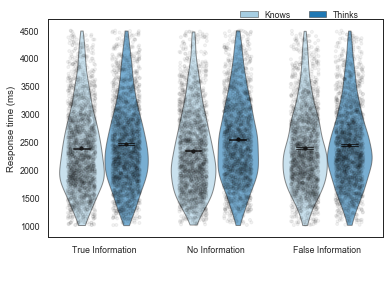

In [6]:
sns.set(font_scale=1.2)
sns.set_theme(style="white")
#sns.color_palette("Paired")
sns.set_context("paper")
g = sns.violinplot(x='agent_state', y='rt', order=['True Info', 'Ignorance', 'False Info'], hue='ascription', hue_order=['Knows', 'Thinks'] , kind='violin', cut=0, inner=None, bw=.25, linewidth=1, saturation=1, palette="Paired", data=e13.loc[(e13.correct==True) & (e13.in_sample == True)]);

sns.stripplot(x='agent_state', y='rt', order=['True Info', 'Ignorance', 'False Info'], hue='ascription', hue_order=['Knows', 'Thinks'] , color='k',size=3, dodge=True,  jitter=.25, linewidth=1, alpha=.05, ax=g.axes, data=e13.loc[(e13.correct==True) & (e13.in_sample == True)]).legend_.remove();


sns.pointplot(x='agent_state', y='rt', order=['True Info', 'Ignorance', 'False Info'], hue='ascription', hue_order=['Knows', 'Thinks'], join=False, dodge=.4,capsize=.15,ci=68,errwidth=.8, ax=g.axes, scale=.6, color='k', data =e13.loc[(e13.correct==True) & (e13.in_sample == True)]);

g.axes.yaxis.set_label_text("Response time (ms)")
g.axes.xaxis.set_label_text(" ")
g.axes.xaxis.labelpad = 20
plt.legend(handles=g.axes.legend_.legendHandles[:2], labels=['Knows', 'Thinks']);
#plt.title(f'Agent State x Ascription, N={len(e1dat.subj.unique())}');
sns.move_legend(g.axes, "lower left", bbox_to_anchor=(.55, .965), ncol=2, title=None, frameon=False)
g.set_xticklabels(['True Information', 'No Information', 'False Information']);
[x.set_alpha(.6) for x in g.axes.collections[:6]];

g.figure.savefig('./Figures/rtxagentxasript_exp1-3_final.png', dpi=300)

In [6]:
e13.to_csv('Data/exp_123_dat.csv', sep=',', index=0)

In [37]:
e13.correct.unique()

array([ True, False])

In [9]:
e13 = e13.loc[(e13.in_sample == True) & (e13.correct == True)]
